In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.setup import data_setup
from gallifrey.particles import rotated_dataset

from yt_maps import plot_planet_maps, planet_figure_name_formatting


      NumExpr defaulting to 8 threads.



## DATA SETUP

In [4]:
snapshot = 127
resolution = 8192
sim_id = "37_11"
num_embryos = 50
host_star_masses = (0.1, 0.3, 0.5, 0.7, 1)
# host_star_masses = 1
planet_categories = [
    "Earth",
    "Super-Earth",
    "Neptunian",
    "Sub-Giant",
    "Giant",
    "D-Burner",
]

figure_subdirectory = f"MilkyWayAnalogue/{resolution}/{sim_id}/{snapshot}/Planet_maps"
save = True

In [5]:
ds, mw, stellar_model, imf, planet_model, path = data_setup(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
    ngpps_num_embryos=num_embryos,
    ngpps_star_masses=host_star_masses,
)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-09-21 09:27:18,687 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-09-21 09:27:18,744 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-09-21 09:27:18,745 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-09-21 09:27:18,745 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-21 09:27:18,746 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-09-21 09:27:18,746 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-09-21 09:27:18,746 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-09-21 09:27:18,747 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-09-21 09:27:18,747 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-09-21 09:27:18,747 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## CREATE DATA SOURCE

In [6]:
radius = 80  # can contain a cube of 80/sqrt(3) = 46 kpc, so plots with a smaller width will have no edge effects
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [7]:
sphere_data = mw.sphere(radius=ds.quan(radius, "kpc"))

rotated_sphere_data = rotated_dataset(
    sphere_data,
    mw.centre(),
    normal_vector,
    [
        *[("stars", f"{category}") for category in planet_categories],
    ],
    bounding_box=[[-ds.domain_width[0] / 2, ds.domain_width[0] / 2]] * 3,
)

yt : [INFO     ] 2023-09-21 09:28:53,939 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-09-21 09:28:53,940 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-09-21 09:28:53,940 Parameters: domain_left_edge          = [-78.5896246 -78.5896246 -78.5896246]
yt : [INFO     ] 2023-09-21 09:28:53,940 Parameters: domain_right_edge         = [79.26039752 79.26039752 79.26039752]
yt : [INFO     ] 2023-09-21 09:28:53,941 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-21 09:28:53,942 Allocating for 3.463e+05 particles


## FACE-ON MAPS

yt : [INFO     ] 2023-09-21 09:28:54,188 xlim = -21.314614 21.985386
yt : [INFO     ] 2023-09-21 09:28:54,189 ylim = -21.314614 21.985386
yt : [INFO     ] 2023-09-21 09:28:54,191 xlim = -21.314614 21.985386
yt : [INFO     ] 2023-09-21 09:28:54,191 ylim = -21.314614 21.985386
yt : [INFO     ] 2023-09-21 09:28:54,195 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:28:54,771 Splatting (('stars', 'D-Burner')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:28:54,947 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:28:55,131 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:28:55,327 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:28:55,403 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'


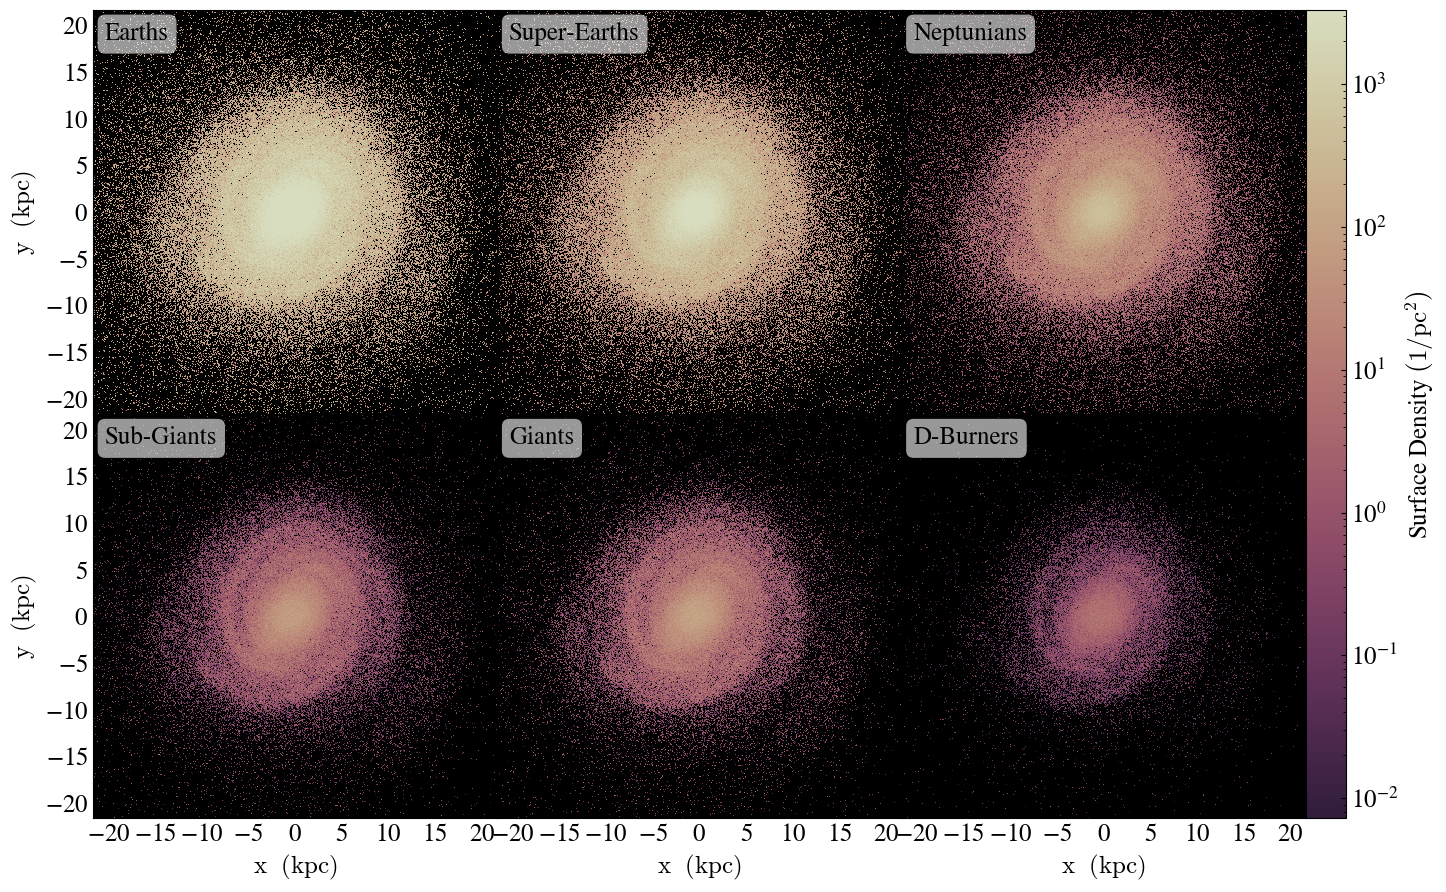

In [8]:
zplot, zfig = plot_planet_maps(
    planet_categories,
    rotated_sphere_data,
    normal="z",
    colorbar_normalisation="global",
    subplot_pad=0,
    save=save,
    figure_subdirectory=figure_subdirectory,
    figure_name_addon=planet_figure_name_formatting(host_star_masses),
)

## SIDE-ON MAPS

yt : [INFO     ] 2023-09-21 09:29:23,996 xlim = -21.314614 21.985386
yt : [INFO     ] 2023-09-21 09:29:23,996 ylim = -21.314614 21.985386
yt : [INFO     ] 2023-09-21 09:29:23,998 xlim = -21.314614 21.985386
yt : [INFO     ] 2023-09-21 09:29:23,998 ylim = -21.314614 21.985386
yt : [INFO     ] 2023-09-21 09:29:23,999 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:29:24,327 Splatting (('stars', 'D-Burner')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:29:24,488 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:29:24,679 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:29:24,865 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-09-21 09:29:24,938 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'


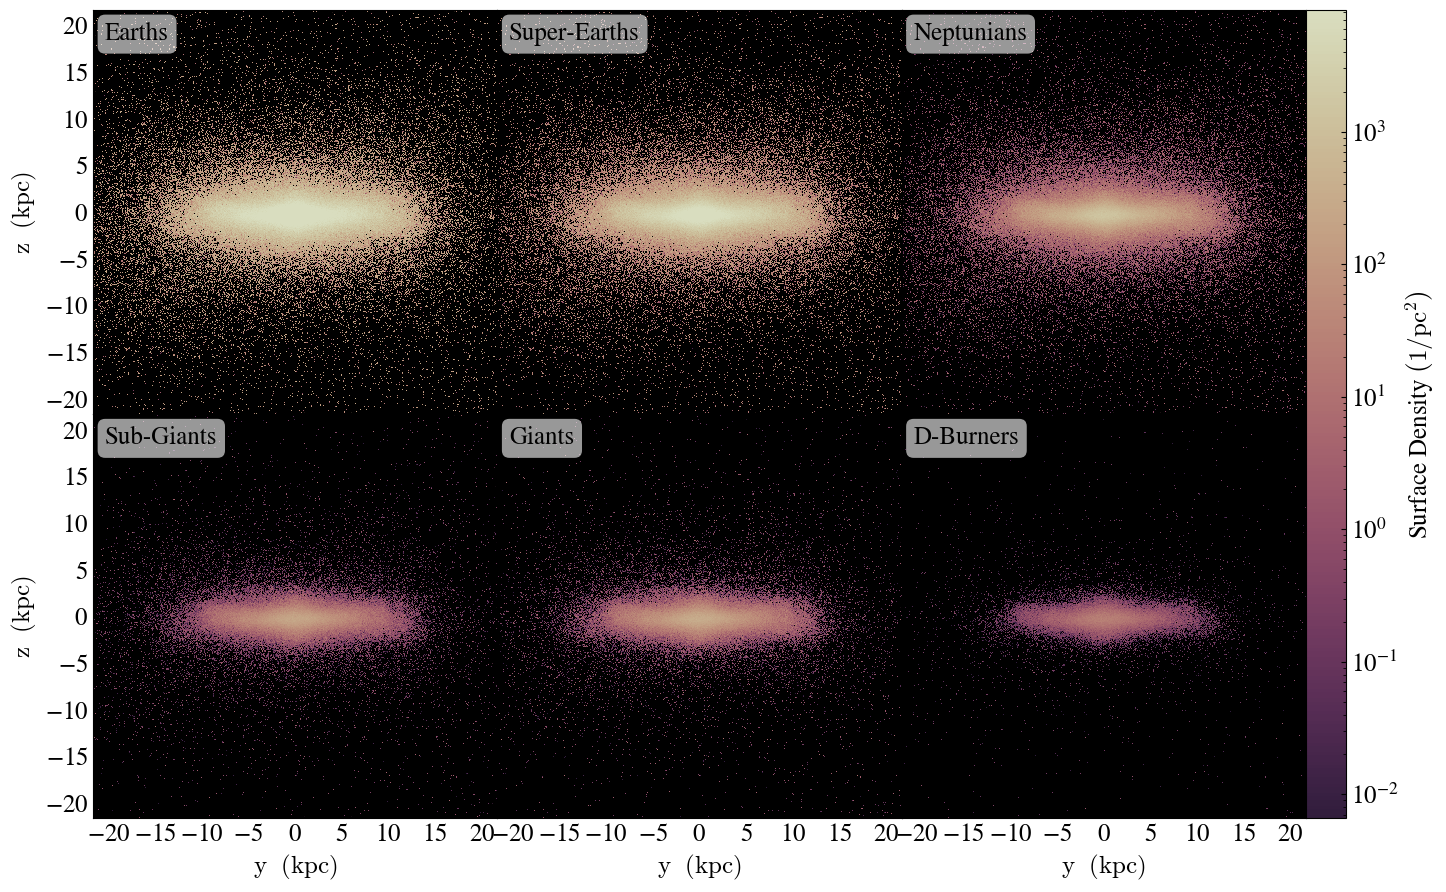

In [9]:
zplot, zfig = plot_planet_maps(
    planet_categories,
    rotated_sphere_data,
    normal="x",
    colorbar_normalisation="global",
    subplot_pad=0,
    save=save,
    figure_subdirectory=figure_subdirectory,
    figure_name_addon=planet_figure_name_formatting(host_star_masses),
)